## 신경망 개념
# 케라스 MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
keras.__version__

'2.2.4'

### MNIST 불러오기
- C:\Users\name\\.keras\datasets\mnist.npz

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11493376/11490434 [==============================] - 7s 1us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
X_train.max(), X_train.min()

(255, 0)

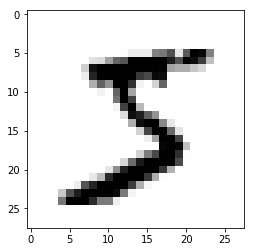

In [7]:
plt.imshow(X_train[0], cmap='gray_r')

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 데이터 전처리
- 이미지를 1차원으로 풀고, 최대값이 1이 되게 실수값으로 바꾼다
- 목표값을 원핫인코딩으로 바꾼다

In [9]:
X_train = X_train.reshape(-1,28*28)/255.
X_test = X_test.reshape(-1,28*28)/255.

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### MNIST 신경망 구조

<img src='https://mmlind.github.io/images/1lnn_input.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)
> 그림에서 픽셀 갯수가 잘못 표기됨 (784가 맞음)

<img src='https://mmlind.github.io/images/1lnn_nnlayer.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 픽셀 수가 784 이므로 속성 갯수가 784인 경우이다.
- w1, w2, w3, ..., w784, b
- w1\*x1 + w2\*x2 + ... + w784\*x784 + b

<img src='https://mmlind.github.io/images/1lnn.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 타겟 클래스가 10개이므로, 가중치와 절편이 그 만큼 늘어난다.
- 클래스값 0 => w1_1, w2_1, ..., w784_1, b1
- 클래스값 1 -> w1_2, w2_2, ..., w784_2, b2
- 가중치갯수 = 784\*10, 절편갯수 = 10

<img src='https://mmlind.github.io/images/1lnn_full.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

### 비용함수
- 위와 같은 결과를 얻었을 때, 손실값을 어떻게 계산할까?
- mse = (0.003126 - 0)^2 + ... + (0.682134 - 1)^2 + ...
- 위와 같이 mse 를 적용할 수 있다.
- 하지만, 이런 멀티 클래스의 경우에는 다른 손실값을 적용하는 것이 일반적이다.
- 위 그림은 숫자 6을 판별한 것이다. 그러므로 결과값은 6 위치만 값이 1이다.
> cross\_entropy\_i = -log(0.682134), 입력 이미지 1개에 대한 손실값
- 모든 숫자 이미지에 대한 크로스엔트로피를 평균한 것이 최종값이다.
> $ cross\_entropy = {1 \over N} \sum_{i=0}^{N-1} {-log(cross\_entropy\_i)} $

### 활성화함수 (소프트맥스)
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6QRL4yW5p4j634dzSyjZWMWWCGXaU_MZVnqDq_HErnH5RCCIizQ' />
(출처 : https://www.google.com/search?tbm=isch&sa=1&ei=VFNCXfrICcybmAWZw6_ACQ&q=mnist+softmax&oq=mnist+softmax&gs_l=img.3..0i24l3.528.3330..3872...0.0..1.585.3193.0j1j5j2j1j1......0....1..gws-wiz-img.uKr_Bjki0oA&ved=0ahUKEwj6wvvf1ODjAhXMDaYKHZnhC5gQ4dUDCAY&uact=5#imgrc=Bwc55tfbS2SjXM:)

- 실제로는 위와 같이 마지막 출력값을 내기 전에 softmax 라는 함수를 적용하여 출력값을 바꾸어 준다.

<img src='https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg' />
(출처: https://www.youtube.com/watch?v=lvNdl7yg4Pg)

- 출력값이 [2,1,0.1] 일때, 각각에 exponential 지수를 적용한 값의 비율을 구한 것이 softmax 이다.
- softmax 를 적용하면 최종 출력값을 모두 더하면 1이 된다. (즉 확률 개념이 된다.)

<img src='mnist_nn.jpg' />
(출처: http://users.jyu.fi/~olkhriye/ties4911/lectures/Lecture03.pdf )<br>
<img src='https://image.slidesharecdn.com/tensorflowppt-160408142819/95/tensorflow-5-638.jpg?cb=1460125744' />
(출처: https://www.slideshare.net/jirimaterna/tensorflow-60661959 )

### 단층 신경망 (로지스틱 회귀)
- 입력층 : 이미지
- 중간층 : 없음
- 출력층 : 뉴런 10개
- 출력층 활성화함수 : 소프트맥스
- 비용함수 : 크로스엔트로피

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adagrad

In [12]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['acc'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.4424 - acc: 0.8814
Epoch 2/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.3026 - acc: 0.9161
Epoch 3/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2890 - acc: 0.9209
Epoch 4/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2835 - acc: 0.9231
Epoch 5/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2812 - acc: 0.9243
Epoch 6/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2793 - acc: 0.9261
Epoch 7/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2789 - acc: 0.9268
Epoch 8/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2783 - acc: 0.9283
Epoch 9/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2781 - acc: 0.9286
Epoch 10/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2779 - a

60000/60000 [==============================] - 2s 33us/step - loss: 0.2946 - acc: 0.9360
Epoch 82/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2952 - acc: 0.9359
Epoch 83/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2946 - acc: 0.9354
Epoch 84/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2955 - acc: 0.9364
Epoch 85/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2952 - acc: 0.9357
Epoch 86/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2958 - acc: 0.9355
Epoch 87/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2952 - acc: 0.9364
Epoch 88/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2952 - acc: 0.9355
Epoch 89/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2964 - acc: 0.9364
Epoch 90/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2965 - acc: 

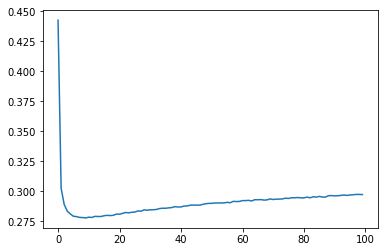

In [14]:
plt.plot(model.history.history['loss'])

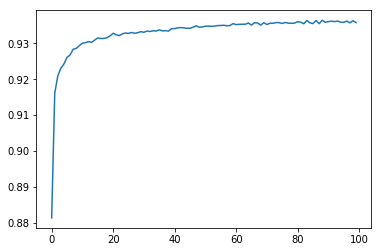

In [15]:
plt.plot(model.history.history['acc'])

In [16]:
pred_y = model.predict(X_test)
pred_y

array([[1.1792679e-12, 2.7637476e-24, 1.9592238e-15, ..., 9.9999821e-01,
        1.5310541e-12, 1.7533464e-06],
       [2.2764635e-07, 4.4266580e-11, 9.9999869e-01, ..., 0.0000000e+00,
        4.8110565e-17, 0.0000000e+00],
       [1.8461976e-13, 9.9887377e-01, 8.1026100e-04, ..., 7.9675383e-10,
        2.1360963e-04, 4.6588709e-11],
       ...,
       [1.1883719e-16, 3.4811485e-19, 2.9415980e-15, ..., 1.5325076e-03,
        4.8836935e-03, 2.9194718e-02],
       [2.4547430e-19, 3.4973871e-16, 1.9579282e-19, ..., 2.0814567e-17,
        3.1036898e-04, 4.4661624e-18],
       [3.3577186e-15, 3.3257357e-37, 1.9895514e-13, ..., 1.0769999e-25,
        1.3964386e-19, 2.2228761e-29]], dtype=float32)

In [17]:
(pred_y.argmax(axis=1)==y_test.argmax(axis=1)).mean()

0.9258

In [18]:
ws = model.get_weights()
ws[0].shape, ws[1].shape

((784, 10), (10,))

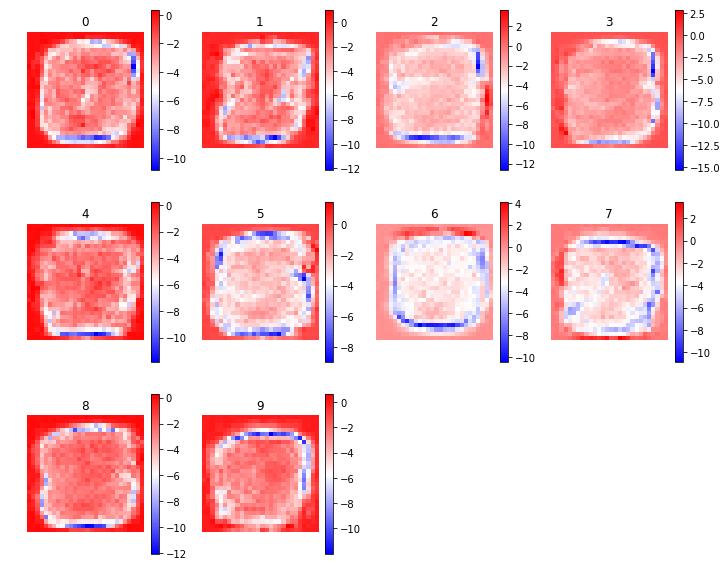

In [22]:
plt.figure(figsize=[12,10])

for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(ws[0][:,i].reshape(28,28), cmap='bwr')
    plt.axis('off')
    plt.title(i)
    plt.colorbar()

### 중간층 추가

In [29]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [31]:
48000/128

375.0

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['acc'])
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.3131 - acc: 0.9047 - val_loss: 0.1776 - val_acc: 0.9476
Epoch 2/50
48000/48000 [==============================] - 2s 52us/step - loss: 0.1238 - acc: 0.9621 - val_loss: 0.1054 - val_acc: 0.9692
Epoch 3/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.0843 - acc: 0.9739 - val_loss: 0.0930 - val_acc: 0.9734
Epoch 4/50
48000/48000 [==============================] - 2s 37us/step - loss: 0.0607 - acc: 0.9805 - val_loss: 0.1007 - val_acc: 0.9730
Epoch 5/50
48000/48000 [==============================] - 2s 37us/step - loss: 0.0483 - acc: 0.9852 - val_loss: 0.0908 - val_acc: 0.9770
Epoch 6/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.0375 - acc: 0.9882 - val_loss: 0.1078 - val_acc: 0.9742
Epoch 7/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.0304 - acc: 0.9903 - val_loss: 0.1042 - val_acc

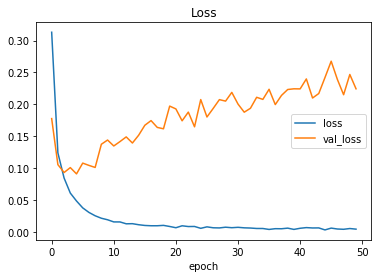

In [33]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

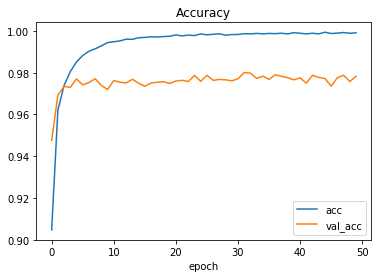

In [34]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

- 미니배치 : 훈련데이터를 일정한 갯수만큼 나누어 훈련시키고 가중치를 업데이트한다 (batch_size=128)
- 검증데이터 : 훈련데이터 중 일부를 검증을 위해 따로 떼어놓고 loss 와 acc 를 별도로 계산한다
    - validation_split
    - validation_data

In [30]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Trains the model for a given number of epochs (iterations on a dataset).
    
    # Arguments
        x: Numpy array of training data (if the model has a single input),
            or list of Numpy arrays (if the model has multiple inputs).
            If input layers in the model are named, you can also pass a
            dictionary mapping input names to Numpy arrays.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data
            (if the model has a single output),
            or list of Numpy arrays (if the model has 

In [35]:
pred_y_train = model.predict(X_train)
pred_y_train.shape

(60000, 10)

In [36]:
(pred_y_train*y_train).sum()/len(y_train) # score of train

0.99525468409388

In [37]:
pred_y_test = model.predict(X_test)
pred_y_test.shape

(10000, 10)

In [38]:
(pred_y_test*y_test).sum()/len(y_test) # score of test

0.9777991885025654

> **연습문제**
> - 오류가 발생한 이미지를 출력하시오

In [40]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [42]:
pred_y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
idx = np.where(y_test.argmax(axis=1)!=pred_y_test.argmax(axis=1))

In [44]:
idx

(array([ 115,  119,  247,  340,  409,  432,  445,  448,  495,  582,  646,
         684,  691,  810,  895,  900,  938,  947,  951,  965, 1014, 1039,
        1050, 1101, 1112, 1156, 1178, 1182, 1192, 1194, 1226, 1242, 1247,
        1272, 1299, 1319, 1378, 1393, 1414, 1527, 1530, 1549, 1553, 1609,
        1654, 1670, 1681, 1709, 1751, 1754, 1790, 1901, 1952, 1981, 1984,
        2004, 2018, 2024, 2029, 2035, 2053, 2098, 2109, 2118, 2129, 2130,
        2135, 2161, 2162, 2189, 2293, 2299, 2325, 2339, 2387, 2406, 2414,
        2426, 2433, 2480, 2582, 2597, 2607, 2610, 2648, 2654, 2743, 2760,
        2771, 2863, 2877, 2921, 2927, 2930, 2939, 2953, 3030, 3060, 3062,
        3073, 3115, 3117, 3422, 3451, 3503, 3520, 3534, 3549, 3558, 3559,
        3597, 3681, 3727, 3749, 3751, 3780, 3808, 3838, 3853, 3871, 3893,
        3902, 3941, 3943, 3976, 3985, 4000, 4027, 4065, 4075, 4140, 4154,
        4163, 4176, 4205, 4224, 4248, 4271, 4289, 4321, 4355, 4359, 4360,
        4369, 4419, 4425, 4433, 4439, 

(7, 2)

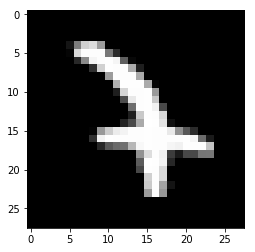

In [53]:
id = 4433
plt.imshow(X_test[id].reshape(28,28), cmap='gray')
y_test.argmax(axis=1)[id], pred_y_test.argmax(axis=1)[id]

### 모델 저장

In [36]:
model.save('mnist_model_01.h5') # creates a HDF5 file

In [39]:
from keras.models import load_model

model2 = load_model('mnist_model_01.h5')

In [42]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2.predict(X_test)

array([[1.7897082e-18, 1.2604499e-14, 1.4408841e-12, ..., 1.0000000e+00,
        1.5553001e-17, 8.6794649e-10],
       [2.2513420e-24, 1.3519225e-10, 1.0000000e+00, ..., 3.6946021e-16,
        4.7015980e-20, 1.3197994e-25],
       [1.9272220e-10, 9.9997580e-01, 1.7852156e-07, ..., 2.1316106e-05,
        2.4139629e-08, 4.9846496e-09],
       ...,
       [1.1987138e-27, 4.3853409e-23, 5.8669306e-25, ..., 1.4196603e-16,
        3.5619537e-23, 8.0281834e-15],
       [8.6556915e-25, 2.5036305e-26, 1.9347526e-25, ..., 1.2481194e-22,
        1.9484564e-16, 3.3102383e-25],
       [2.1923046e-24, 1.4936362e-32, 1.3257251e-30, ..., 4.9728456e-38,
        1.6158497e-25, 1.5502201e-29]], dtype=float32)

- 가중치 저장 및 로딩

In [ ]:
model.save_weights("mnist_weights_01.h5")
model2.load_weights("mnist_weights_01.h5")

### Flatten
- 출력값을 1차원으로 풀어준다

In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [49]:
X_train = X_train/255
X_test = X_test/255

In [60]:
from keras.layers import Flatten

In [50]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.fit(X_train, np.eye(10)[y_train], epochs=2, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 14s 296us/step - loss: 0.3087 - acc: 0.9046 - val_loss: 0.1806 - val_acc: 0.9437
Epoch 2/2
48000/48000 [==============================] - 13s 270us/step - loss: 0.1212 - acc: 0.9628 - val_loss: 0.1149 - val_acc: 0.9656


In [53]:
pred_y_train = model.predict(X_train)

In [54]:
(pred_y_train.argmax(axis=1)==y_train).mean()

0.9737

### Dropout
- Dropout 은 고의적으로 중간 단계의 출력값 들을 누락시키는 것이다.
- 이렇게 하면 모델이 좀 더 예외상황에 견딜 수 있게 하여, 새로운 데이터에 대한 예측 능력을 키울 수 있다고 알려져 있다.
- 사진의 일부분을 가리거나 시야가 흐릿해 지는 등의 효과와 비슷하다.
- 여러가지 예외사항에 대처가 가능한 강건한 모델을 만들 수 있다.
- 훈련시에는 출력값을 누락시키지만, 검증시에는 모든 출력값을 사용한다. (단 누락비율에 맞게 출력값을 줄여준다)

In [61]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [62]:
X_train = X_train/255
X_test = X_test/255

In [63]:
from keras.layers import Flatten, Dropout

In [64]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [66]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.fit(X_train, np.eye(10)[y_train], epochs=100, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 65us/step - loss: 0.6193 - acc: 0.8024 - val_loss: 0.2130 - val_acc: 0.9384
Epoch 2/100
48000/48000 [==============================] - 3s 58us/step - loss: 0.3234 - acc: 0.9054 - val_loss: 0.1605 - val_acc: 0.9554
Epoch 3/100
48000/48000 [==============================] - 2s 47us/step - loss: 0.2680 - acc: 0.9225 - val_loss: 0.1449 - val_acc: 0.9589
Epoch 4/100
48000/48000 [==============================] - 2s 48us/step - loss: 0.2348 - acc: 0.9319 - val_loss: 0.1309 - val_acc: 0.9642
Epoch 5/100
48000/48000 [==============================] - 3s 54us/step - loss: 0.2221 - acc: 0.9375 - val_loss: 0.1256 - val_acc: 0.9658
Epoch 6/100
48000/48000 [==============================] - 2s 46us/step - loss: 0.2052 - acc: 0.9419 - val_loss: 0.1183 - val_acc: 0.9670
Epoch 7/100
48000/48000 [==============================] - 2s 46us/step - loss: 0.1934 - acc: 0.9459 - val_loss: 0.1133 - 

48000/48000 [==============================] - 3s 53us/step - loss: 0.1496 - acc: 0.9662 - val_loss: 0.1230 - val_acc: 0.9768
Epoch 60/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.1452 - acc: 0.9663 - val_loss: 0.1215 - val_acc: 0.9751
Epoch 61/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.1529 - acc: 0.9645 - val_loss: 0.1201 - val_acc: 0.9762
Epoch 62/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.1463 - acc: 0.9668 - val_loss: 0.1290 - val_acc: 0.9747
Epoch 63/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.1531 - acc: 0.9653 - val_loss: 0.1244 - val_acc: 0.9752
Epoch 64/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.1528 - acc: 0.9653 - val_loss: 0.1237 - val_acc: 0.9752
Epoch 65/100
48000/48000 [==============================] - 3s 54us/step - loss: 0.1486 - acc: 0.9673 - val_loss: 0.1337 - val_acc: 0.9753
Epoch 66/100
48000/48000 [==============

In [62]:
pred_y_train = model.predict(X_train)
(pred_y_train.argmax(axis=1)==y_train).mean()

0.9776833333333333

In [63]:
pred_y_test = model.predict(X_test)
(pred_y_test.argmax(axis=1)==y_test).mean()

0.9709

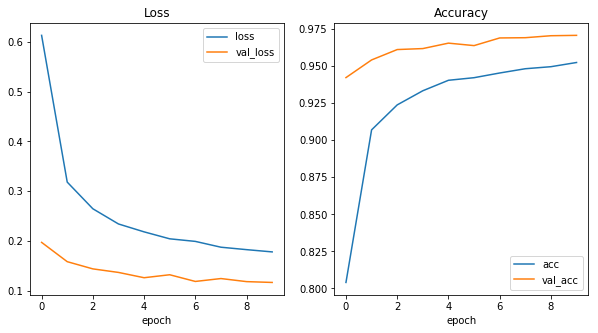

In [64]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

### cifar-10 이미지 적용
- http://www.cs.toronto.edu/~kriz/cifar.html
- cifar-10-python.tar.gz

In [67]:
import pickle

X_train = None
y_train = []

for i in range(1,6):
    f = open('../프로그래밍/keras_new/cifar10/data_batch_'+str(i), 'rb')
    d = pickle.load(f, encoding='bytes') # [b'batch_label', b'labels', b'data', b'filenames']
    f.close()
    
    X_now = d[b'data']
    if i==1:
        X_train = X_now
    else:
        X_train = np.r_[X_train, X_now]
        
    y_train += d[b'labels']

FileNotFoundError: [Errno 2] No such file or directory: '../프로그래밍/keras_new/cifar10/data_batch_1'

In [ ]:
X_train = np.moveaxis(X_train.reshape(-1,3,32,32), 1, -1)